# Converting CPTECs MERGE files

Author     : MJT 

Institution: RCGI / IFUSP

Date       : 27-Apr-2022

Version    : PA1

In [13]:
import os 
import xarray as xr
import rioxarray as rio
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/mjt/miniconda3/envs/gdal/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_2651/1125663037.py", line 4, in <cell line: 4>
    import geopandas as gpd
  File "/home/mjt/miniconda3/envs/gdal/lib/python3.10/site-packages/geopandas/__init__.py", line 1, in <module>
    from geopandas._config import options  # noqa
  File "/home/mjt/miniconda3/envs/gdal/lib/python3.10/site-packages/geopandas/_config.py", line 126, in <module>
    default_value=_default_use_pygeos(),
  File "/home/mjt/miniconda3/envs/gdal/lib/python3.10/site-packages/geopandas/_config.py", line 112, in _default_use_pygeos
    import geopandas._compat as compat
  File "/home/mjt/miniconda3/envs/gdal/lib/python3.10/site-packages/geopandas/_compat.py", line 10, in <module>
    import shapely.geos
ModuleNotFoundError: No module named 'shapely.geos'

During handling of 

In [9]:
import cfgrib 

/home/mjt/miniconda3/envs/gdal/lib/python3.10/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
module 'xarray.backends' has no attribute 'locks'
  try:
/home/mjt/miniconda3/envs/gdal/lib/python3.10/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
module 'xarray.backends' has no attribute 'common'
  try:


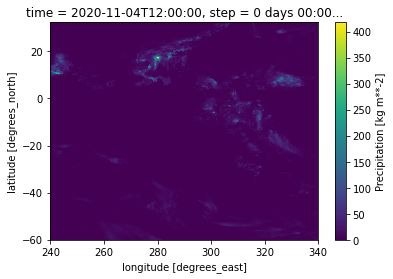

In [10]:
filename = '/mnt/c/Users/Marcio/Desktop/Sat Data/MERGE_CPTEC_20201104.grib2'

cptec_file = xr.open_dataset(filename,engine = 'cfgrib')

cptec_file.prec.plot()

In [11]:
cptec_file

<xarray.Dataset>
Dimensions:     (latitude: 924, longitude: 1001)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude   (longitude) float64 239.9 240.0 240.1 ... 339.8 339.9 340.0
    valid_time  datetime64[ns] ...
Data variables:
    prec        (latitude, longitude) float32 ...
    prmsl       (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             consensus
    GRIB_centreDescription:  Consensus
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Consensus
    history:                 2022-05-13T11:23 GRIB to CDM+CF via cfgrib-0.9.1...

In [12]:
# melhorando o plot

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree()) #robinson for axes???
ax.coastlines(resolution="10m")
# plot = cptec_file.prec.plot(
#     cmap=plt.cm.coolwarm, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6}
plot = cptec_file.prec.plot(
    cmap=plt.cm.Reds 
)

NameError: name 'plt' is not defined

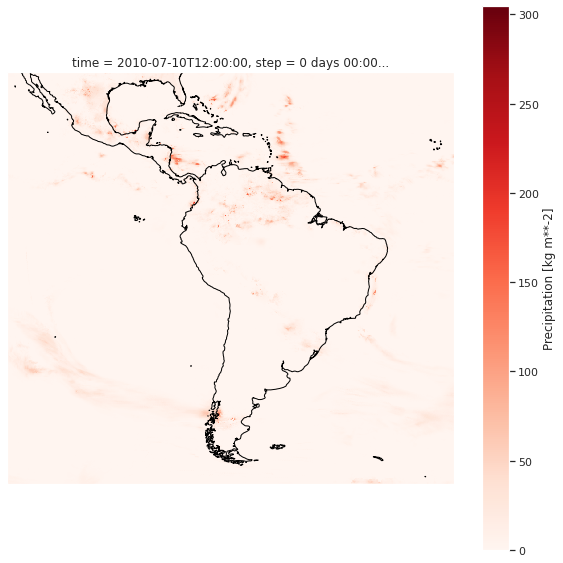

In [ ]:
# now will open the merged file and do the same 

filename = '/mnt/c/Users/Marcio/Desktop/Sat Data/2010/07/july.grib2'
merged = xr.load_dataset(filename,engine = 'cfgrib') # note I changed to **load_dataset**
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree()) #robinson for axes???
ax.coastlines(resolution="50m")
# plot = cptec_file.prec.plot(
#     cmap=plt.cm.coolwarm, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6}
plot = merged.prec[9].plot(
    cmap=plt.cm.Reds 
)


In [ ]:
for v in merged:
    print("{}, {}, {}".format(v, merged[v].attrs["long_name"], merged[v].attrs["units"]))

prec, Precipitation, kg m**-2
prmsl, Pressure reduced to MSL, Pa


## Building a time series with merged file

In [ ]:
# getting precipitation and converting to a DF

my_prec = merged.get('prec')
df_prec = my_prec.to_dataframe()

lats = df_prec.index.get_level_values('latitude')
longs = df_prec.index.get_level_values('longitude')
time = df_prec.index.get_level_values('time')

df_prec["longitude"] = longs
df_prec["latitude"] = lats
df_prec['time'] = time


In [ ]:
df_prec = df_prec[['latitude','longitude','time','prec']]

#filtering a location

# # Petrolina 9.3995° S, 40.5024° W


# min_lat = -9.50
# max_lat = -9.35
# min_long = 320.10
# max_long = 320.50




min_lat = -23.50
max_lat = -23.35
min_long = 249.20
max_long = 249.30

lat_filter = (df_prec["latitude"] >= min_lat) & (df_prec["latitude"] <= max_lat)
lon_filter = (df_prec["longitude"] >= min_long) & (df_prec["longitude"] <= max_long)

df_prec_plot = df_prec.loc[lat_filter & lon_filter]


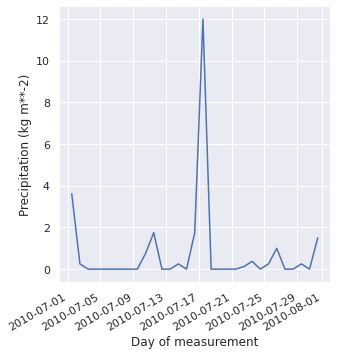

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
my_plot = sns.relplot(x="time", y="prec", kind = 'line', data=df_prec_plot)
my_plot.figure.autofmt_xdate()
my_plot.set_axis_labels("Day of measurement", "Precipitation (kg m**-2)")


In [1]:
df_prec

NameError: name 'df_prec' is not defined

### Fazendo a conversão para vector

In [ ]:
import time
start_time = time.time()
gdf.to_file('timetest.shp')

print('Processing time:', time.time()-start_time)